localized 38 20
ciudades 113 122
bringing 118 89
wednesday 121 114
gaskets 111 121
273 122 111
designing 118 89
asuntos 114 120
dns 109 120
dagriculture 120 116
want 105 111
absolute 108 111
sedi 117 114
18th 121 114
welcomed 106 113
bauherrenuntersttzung 114 118
fil 121 115
effects 109 115
adapt 105 110
leinex 108 119
kfc 113 115
service 107 115
needed 105 112
feeling 111 114
affairs 37 19
that 106 111
limitless 118 89
bradford 125 113
tech 107 118
saying 114 115
rice 118 107
plate 111 120
sensitivity 109 107
lots 106 109
solenoid 109 116
extend 106 115
nature 106 113
engility 121 114
much 106 111
administrative 107 116
k 124 111
svitolina 118 109
workforce 108 110
academic 37 19
corporate 38 21
had 105 111
has 105 113
municipal 108 117
begin 105 112
bottom 107 112
onbevoegden 110 107
marshall 125 113
universitys 111 118
safeguard 109 120
passenger 108 115
mirror 111 120
careerone 122 115
palms 112 117
hawkes 113 113
chain 38 20
egypts 110 115
oversight 108 119
biopharmaceuticals 121 

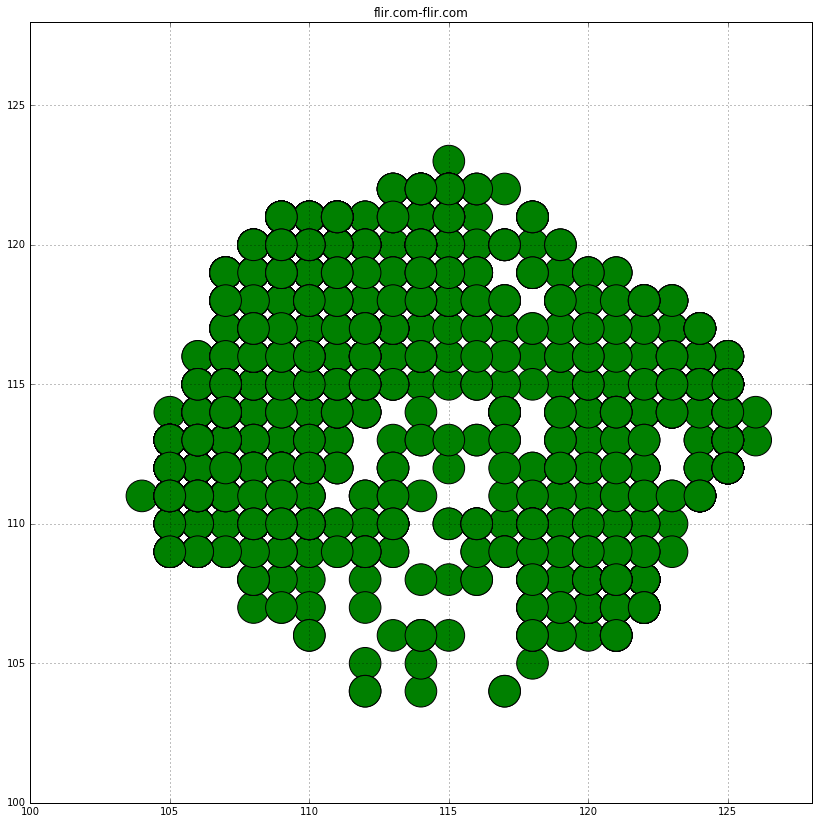

In [83]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from gensim.models import KeyedVectors

word_vectors = KeyedVectors.load('models/data_for_classification_text')
url= "flir.com"
url2= "flir.com"
def import_from_data_file(url):
    with open('data/data_for_classification.tsv', 'r') as source:
        for line in source:
            row_els = line.split('\t')
            if url == row_els[0].strip():
                row_els = [word.lower().strip() for word in row_els[1].split(' ')]
                return row_els
            else:
                continue
    print "URL NO FOUND IN SOURCE FILE"
    return [] 

def set_words(words1, doc):
    fprint = []
    for w11 in words1:
        if w11 in word_vectors.wv.vocab.keys():
            fprint.append(w11.strip())
            doc.append(w11.strip())
            for w12, dist in word_vectors.most_similar(positive=[w11], topn=20):
                fprint.append(w12.strip())
                doc.append(w12.strip())
    return fprint, doc

sizes = []
cols = []
doc = []

words1 = import_from_data_file(url)
fprint1, doc = set_words(words1, doc)
#print len(doc)

words2 = import_from_data_file(url2)
fprint2, doc = set_words(words2, doc)
#print len(doc)
        
arrx = []
arry = []
arrw = []
deja_vu = {}
with open('models/wordmap2.csv', 'r') as source:
    for line in source:
        word, x, y = line.split(',') 
        if word in doc:
            if word in deja_vu.keys():
                print "we caught",word
                deja_vu[word] += 1
            else:
                #print "first timers", word
                deja_vu[word] = 1
            times = deja_vu[word]
                
            #print word
            if word in [url]:
                sizes.append(2000 * times)
                cols.append('cyan')
            elif (word in fprint1) and (word in fprint2):
                sizes.append(1000 * times)
                cols.append('green')
            elif word in fprint1:
                sizes.append(500 * times)
                cols.append('red')
            elif word in fprint2:
                sizes.append(100 * times)
                cols.append('blue')

            arrw.append(word)
            arrx.append(int(x))
            arry.append(int(y))

fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(1,1,1)


ax.scatter(arrx, arry, c=cols, s=sizes)

for i, txt in enumerate(arrw):
    print txt, arrx[i], arry[i]
    #ax.annotate(txt, (arrx[i],arry[i]))
plt.title("{}-{}".format(url,url2))
plt.axis([100,128,100,128])
plt.grid()
plt.savefig("fingerprints/{}-{}.png".format(url,url2))
plt.show()